<center><h1><bold>ASSIGNMENT 3 (EDA)</bold></h1></center>


In [1]:
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re
import seaborn as sns

### READING COUNT VECTORIZER PICKLE DUMPED FILE

In [2]:
data = pd.read_pickle('data_dtm.pkl')
data = data.transpose()
data.head()

,all-about-my-mother-1999,babygirl,den-of-thieves-2-pantera,moana-2,sonic-the-hedgehog-3,star-trek-section-31
abandoned,0,0,0,0,1,0
abandons,0,0,0,0,3,0
abide,0,0,0,0,1,0
abidjan,0,0,1,0,0,0
abilities,0,0,0,0,1,0


## FINDING TOP WORDS FROM EACH MOVIE

In [5]:
# Find the top 30 words in each movie
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'all-about-my-mother-1999': [('dont', 84),
  ('im', 79),
  ('like', 49),
  ('know', 45),
  ('come', 43),
  ('got', 41),
  ('go', 40),
  ('ill', 39),
  ('look', 38),
  ('well', 37),
  ('see', 36),
  ('yes', 33),
  ('youre', 32),
  ('get', 32),
  ('tell', 31),
  ('cant', 30),
  ('want', 29),
  ('ive', 27),
  ('think', 27),
  ('right', 26),
  ('one', 26),
  ('huma', 25),
  ('son', 25),
  ('shes', 25),
  ('didnt', 24),
  ('thank', 24),
  ('mother', 24),
  ('nina', 23),
  ('and', 22),
  ('manuela', 21)],
 'babygirl': [('im', 88),
  ('dont', 79),
  ('okay', 70),
  ('know', 60),
  ('yeah', 59),
  ('want', 59),
  ('oh', 52),
  ('come', 51),
  ('youre', 51),
  ('hey', 49),
  ('like', 47),
  ('good', 41),
  ('romy', 40),
  ('laughs', 36),
  ('chatter', 35),
  ('continues', 34),
  ('go', 34),
  ('thats', 33),
  ('um', 33),
  ('sighs', 31),
  ('sorry', 30),
  ('man', 29),
  ('think', 29),
  ('wait', 28),
  ('yes', 28),
  ('uh', 28),
  ('music', 27),
  ('right', 27),
  ('get', 26),
  ('woman', 25)

In [7]:
# Print the top 15 words in each movie
for movie, top_words in top_dict.items():
    print(movie)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

all-about-my-mother-1999
dont, im, like, know, come, got, go, ill, look, well, see, yes, youre, get
---
babygirl
im, dont, okay, know, yeah, want, oh, come, youre, hey, like, good, romy, laughs
---
den-of-thieves-2-pantera
english, nick, music, donnie, fuck, french, go, hey, one, playing, okay, yeah, good, fucking
---
moana-2
moana, maui, get, gasps, know, grunts, music, got, go, na, playing, well, im, moni
---
sonic-the-hedgehog-3
sonic, im, one, right, shadow, like, dont, know, okay, get, go, oh, knuckles, youre
---
star-trek-section-31
one, im, georgiou, quasi, alok, garrett, know, zeph, us, get, godsend, youre, fuzz, oh
---


In [9]:
from collections import Counter

# Let's first pull out the top 30 words for each movie
words = []
for movie in data.columns:
    top = [word for (word, count) in top_dict[movie]]
    for t in top:
        words.append(t)

words

['dont',
 'im',
 'like',
 'know',
 'come',
 'got',
 'go',
 'ill',
 'look',
 'well',
 'see',
 'yes',
 'youre',
 'get',
 'tell',
 'cant',
 'want',
 'ive',
 'think',
 'right',
 'one',
 'huma',
 'son',
 'shes',
 'didnt',
 'thank',
 'mother',
 'nina',
 'and',
 'manuela',
 'im',
 'dont',
 'okay',
 'know',
 'yeah',
 'want',
 'oh',
 'come',
 'youre',
 'hey',
 'like',
 'good',
 'romy',
 'laughs',
 'chatter',
 'continues',
 'go',
 'thats',
 'um',
 'sighs',
 'sorry',
 'man',
 'think',
 'wait',
 'yes',
 'uh',
 'music',
 'right',
 'get',
 'woman',
 'english',
 'nick',
 'music',
 'donnie',
 'fuck',
 'french',
 'go',
 'hey',
 'one',
 'playing',
 'okay',
 'yeah',
 'good',
 'fucking',
 'serbian',
 'right',
 'im',
 'jovanna',
 'get',
 'dont',
 'got',
 'come',
 'youre',
 'continues',
 'indistinct',
 'grunts',
 'speaking',
 'know',
 'shit',
 'sighs',
 'moana',
 'maui',
 'get',
 'gasps',
 'know',
 'grunts',
 'music',
 'got',
 'go',
 'na',
 'playing',
 'well',
 'im',
 'moni',
 'youre',
 'way',
 'chuckles',


In [11]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('dont', 6),
 ('im', 6),
 ('know', 6),
 ('youre', 6),
 ('get', 6),
 ('like', 5),
 ('come', 5),
 ('go', 5),
 ('right', 5),
 ('got', 4),
 ('one', 4),
 ('okay', 4),
 ('yeah', 4),
 ('oh', 4),
 ('well', 3),
 ('thats', 3),
 ('music', 3),
 ('grunts', 3),
 ('us', 3),
 ('look', 2),
 ('yes', 2),
 ('want', 2),
 ('think', 2),
 ('hey', 2),
 ('good', 2),
 ('laughs', 2),
 ('continues', 2),
 ('sighs', 2),
 ('playing', 2),
 ('na', 2),
 ('way', 2),
 ('gon', 2),
 ('ill', 1),
 ('see', 1),
 ('tell', 1),
 ('cant', 1),
 ('ive', 1),
 ('huma', 1),
 ('son', 1),
 ('shes', 1),
 ('didnt', 1),
 ('thank', 1),
 ('mother', 1),
 ('nina', 1),
 ('and', 1),
 ('manuela', 1),
 ('romy', 1),
 ('chatter', 1),
 ('um', 1),
 ('sorry', 1),
 ('man', 1),
 ('wait', 1),
 ('uh', 1),
 ('woman', 1),
 ('english', 1),
 ('nick', 1),
 ('donnie', 1),
 ('fuck', 1),
 ('french', 1),
 ('fucking', 1),
 ('serbian', 1),
 ('jovanna', 1),
 ('indistinct', 1),
 ('speaking', 1),
 ('shit', 1),
 ('moana', 1),
 ('maui', 1),
 ('gasps', 1),
 ('moni', 1),
 ('

In [13]:
# If more than half of the movie have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['dont', 'im', 'know', 'youre', 'get', 'like', 'come', 'go', 'right']

In [15]:
# Let's update our document-term matrix with the new list of stop words
# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

# **WORDCLOUD GENERATION**

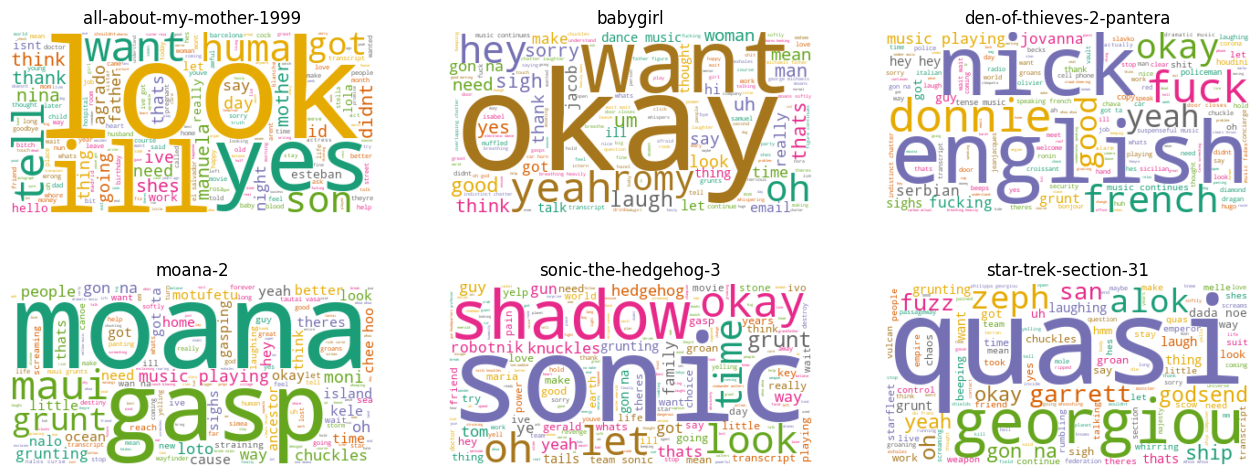

In [45]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
plt.rcParams['figure.figsize'] = [16, 6]
full_names = list(top_dict.keys())

# Create subplots for each movie
for index, movie in enumerate(data.columns):
    wc.generate(data_clean.transcript[movie])

    plt.subplot(2, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movie)

plt.show()

# **ANALYSIS**

## 1. NO OF UNIQUE WORDS IN EACH MOVIE

In [25]:
#new data after removing common stop words
data=pd.read_pickle('dtm_stop.pkl')
data = data.transpose()
data.head()

,all-about-my-mother-1999,babygirl,den-of-thieves-2-pantera,moana-2,sonic-the-hedgehog-3,star-trek-section-31
abandoned,0,0,0,0,1,0
abandons,0,0,0,0,3,0
abide,0,0,0,0,1,0
abidjan,0,0,1,0,0,0
abilities,0,0,0,0,1,0


In [27]:
# Find the number of unique words of each movie
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for movie in data.columns:
    uniques = data[movie].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['movie', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,movie,unique_words
1,babygirl,1250
3,moana-2,1327
0,all-about-my-mother-1999,1402
2,den-of-thieves-2-pantera,1481
5,star-trek-section-31,1649
4,sonic-the-hedgehog-3,1997


## 2. DIALOUGE DENSITY ACROSS MOVIES

In [29]:
total_list = []
for movie in data.columns:
    totals = sum(data[movie])
    total_list.append(totals)

data_words['total_words'] = total_list
scene_counts = [50, 60, 45, 70, 55, 65]  # Example scene counts
data_words['dialogue_density'] = data_words['total_words'] / scene_counts
data_words.sort_values(by='dialogue_density', ascending=False)

,movie,unique_words,total_words,dialogue_density
2,den-of-thieves-2-pantera,1481,4357,96.822222
4,sonic-the-hedgehog-3,1997,4509,81.981818
0,all-about-my-mother-1999,1402,3606,72.120000
5,star-trek-section-31,1649,4092,62.953846
1,babygirl,1250,3741,62.350000
3,moana-2,1327,4124,58.914286


C:\Users\gauta\AppData\Local\Temp\ipykernel_10516\2782053635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie', y='dialogue_density', data=data_words_sorted, palette='viridis')


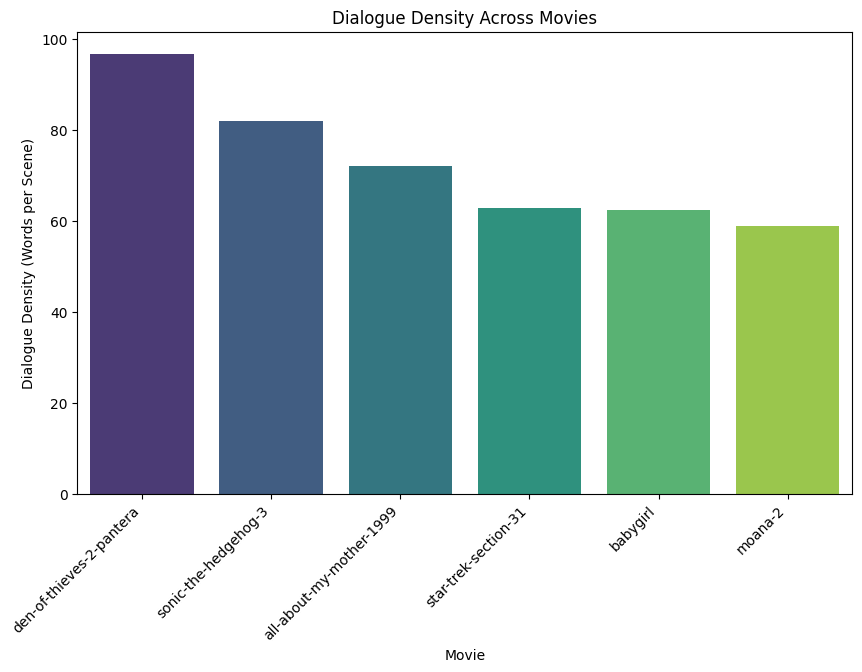

In [31]:
# Sorting data for better visualization
data_words_sorted = data_words.sort_values(by='dialogue_density', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='movie', y='dialogue_density', data=data_words_sorted, palette='viridis')

# Labels and title
plt.xticks(rotation=45, ha='right')  # Rotate movie names for better readability
plt.xlabel("Movie")
plt.ylabel("Dialogue Density (Words per Scene)")
plt.title("Dialogue Density Across Movies")

# Show plot
plt.show()

## FINDINGS

1. sonic-the-hedgehog-3	movie has lots of words
2. den-of-thieves-2-pantera has more words in each scene

# **Amount of Profanity**

In [33]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
all-about-my-mother-1999,8,1
babygirl,17,8
den-of-thieves-2-pantera,105,24
moana-2,0,0
sonic-the-hedgehog-3,0,0
star-trek-section-31,0,5


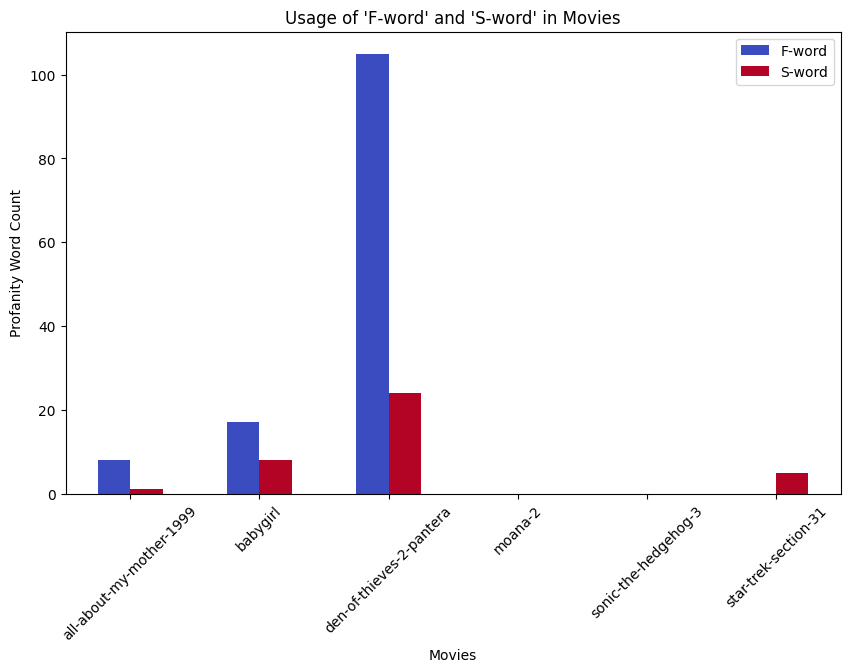

In [43]:
data_profanity.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

plt.xlabel("Movies")
plt.ylabel("Profanity Word Count")
plt.title("Usage of 'F-word' and 'S-word' in Movies")
plt.xticks(rotation=45) 

plt.legend(["F-word", "S-word"])
plt.show()

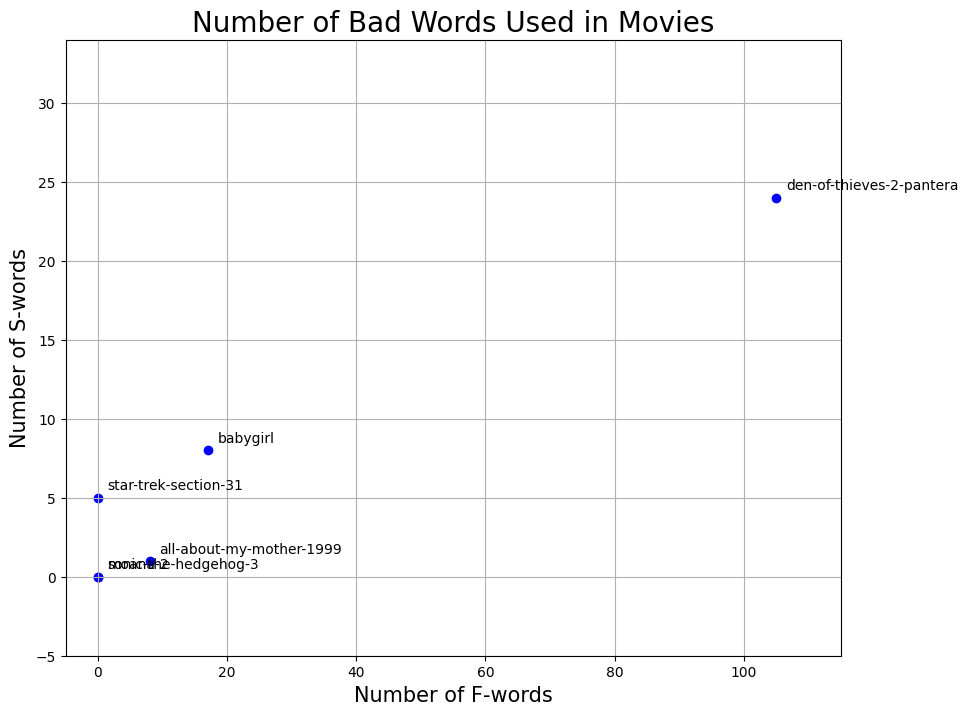

In [47]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, movie in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[movie]
    y = data_profanity.s_word.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x + 1.5, y + 0.5, movie, fontsize=10)  # Adjusting text position for clarity

plt.xlim(-5, max(data_profanity.f_word) + 10)
plt.ylim(-5, max(data_profanity.s_word) + 10)

plt.title('Number of Bad Words Used in Movies', fontsize=20)
plt.xlabel('Number of F-words', fontsize=15)
plt.ylabel('Number of S-words', fontsize=15)

plt.grid(True)
plt.show()

In [39]:
data_emotions = data.transpose()[['love', 'hate']]
data_emotions.columns = ['love_count', 'hate_count']
data_emotions

,love_count,hate_count
all-about-my-mother-1999,9,0
babygirl,12,0
den-of-thieves-2-pantera,3,3
moana-2,9,2
sonic-the-hedgehog-3,10,2
star-trek-section-31,11,1


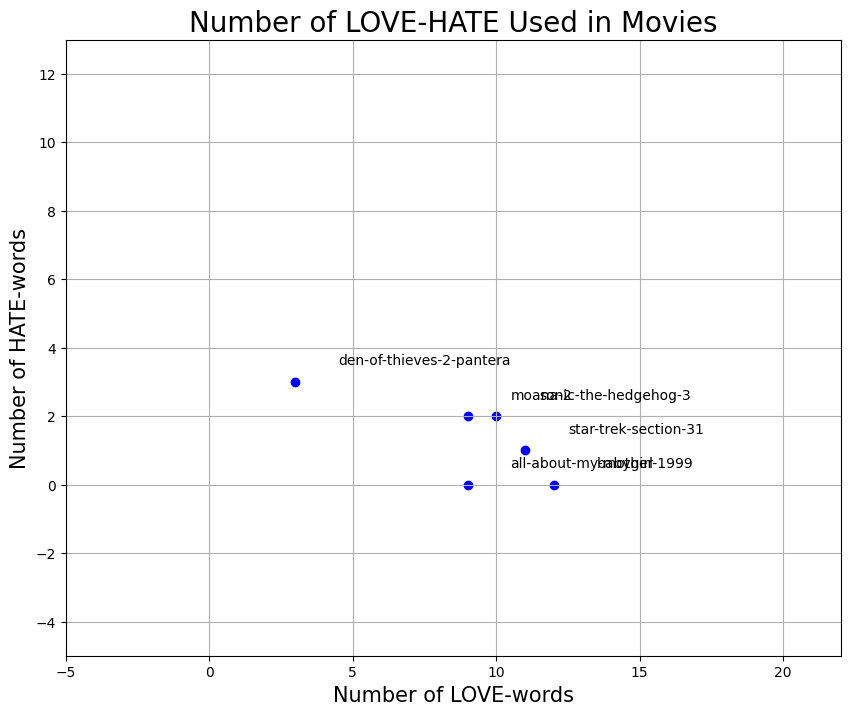

In [49]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, movie in enumerate(data_emotions.index):
    x = data_emotions.love_count.loc[movie]
    y = data_emotions.hate_count.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x + 1.5, y + 0.5, movie, fontsize=10)  # Adjusting text position for clarity

plt.xlim(-5, max(data_emotions.love_count) + 10)
plt.ylim(-5, max(data_emotions.hate_count) + 10)

plt.title('Number of LOVE-HATE Used in Movies', fontsize=20)
plt.xlabel('Number of LOVE-words', fontsize=15)
plt.ylabel('Number of HATE-words', fontsize=15)

plt.grid(True)
plt.show()

## FINDINGS

1. den-of-thieves-2-pantera	has most ammount of f&s words resulting in more violent as more hate count as well
2. babygirl is a most peaceful movie